# Comparing and Evaluating Clustering Algorithms

__Import libraries__

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, NMF
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import silhouette_score

- Metrics to asses the outcome of a clustering algorithm relative to a ground truth clustering.
    - Adjusted Rand Index (ARI)
    - Normalized Mutual Information (NMI)
    - Both provide a quantitave measure with maximum value 1 and 0 for unrelated clusterings. (ARI can be negative).

---

## Evaluating Clustering with Ground Truth

Comparing k-means, agglomerative clustering and DBSCAN using ARI:

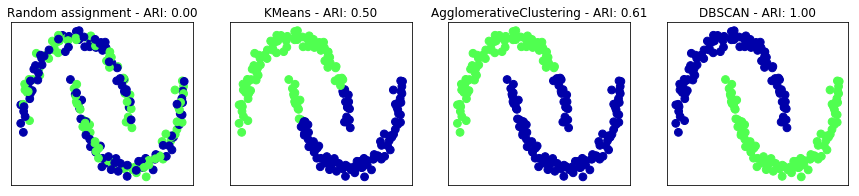

In [4]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks':(), 'yticks':()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster assignment for reference
random_state= np.random.RandomState(0)
random_clusters = random_state.randint(0, 2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
               cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                adjusted_rand_score(y, clusters)))

A common mistake when evaluating clustering in this way is to use accuracy_score
instead of adjusted_rand_score, normalized_mutual_info_score, or some other
clustering metric. The problem in using accuracy is that it requires the assigned cluster
labels to exactly match the ground truth. However, the cluster labels themselves
are meaningless—the only thing that matters is which points are in the same cluster:

In [6]:
# these two labellings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


---

## Evaluating Clustering without Ground Truth

- When evaluating clusering algorithms, usually we dont have ground truth to which to compare the results.
- Therefore, using metrics like ARI and NMI usually only helps in developing algorithms, not in assessing success in an application.
- Scoring metrics which dont need ground truth, like silhouette coefficient.
- The silhouette score computes the compactness of a cluster, where higher is better, with a perfect score of 1. While compact clusters are good, compactness doesn’t allow for complex shapes.

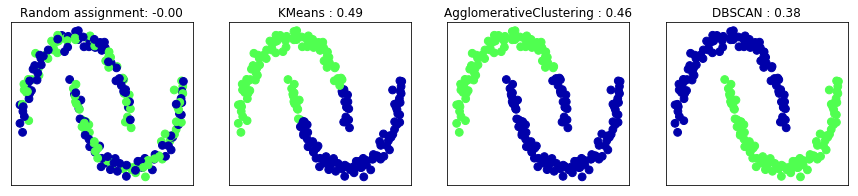

In [9]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                silhouette_score(X_scaled, clusters)))

- k-means has the highest silhouette score, eventhough the result of using DBSCAN is certainly better.

----

# Summary of Clustering Methods

This section has shown that applying and evaluating clustering is a highly qualitative
procedure, and often most helpful in the exploratory phase of data analysis. We
looked at three clustering algorithms: k-means, DBSCAN, and agglomerative clustering.
All three have a way of controlling the granularity of clustering. k-means and
agglomerative clustering allow you to specify the number of desired clusters, while
DBSCAN lets you define proximity using the eps parameter, which indirectly influences
cluster size. All three methods can be used on large, real-world datasets, are relatively
easy to understand, and allow for clustering into many clusters.


Each of the algorithms has somewhat different strengths. k-means allows for a characterization
of the clusters using the cluster means. It can also be viewed as a decomposition
method, where each data point is represented by its cluster center. DBSCAN
allows for the detection of “noise points” that are not assigned any cluster, and it can
help automatically determine the number of clusters. In contrast to the other two
methods, it allow for complex cluster shapes, as we saw in the two_moons example.
DBSCAN sometimes produces clusters of very differing size, which can be a strength
or a weakness. Agglomerative clustering can provide a whole hierarchy of possible
partitions of the data, which can be easily inspected via dendrograms.